<a href="https://colab.research.google.com/github/ayushanand18/pyobis/blob/mof-viz/notebooks/MeasurementOrFact_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MeasurementOrFacts Analysis

MeasurementOrFacts is a measurement of or fact about an rdfs:Resource [http://www.w3.org/2000/01/rdf-schema#Resource](http://www.w3.org/2000/01/rdf-schema#Resource). Resources can be thought of as identifiable records or instances of classes and may include, but need not be limited to dwc:Occurrence, dwc:Organism, dwc:MaterialSample, dwc:Event, dwc:Location, dwc:GeologicalContext, dwc:Identification, or dwc:Taxon.


For example, A MoF record can be the weight of an organism in grams. The number of placental scars. Surface water temperature in Celsius.

> Read more about classifying and studying MeasurementOrFacts [here](https://dwc.tdwg.org/terms/#measurementorfact).


We will use `pyobis` - python client for [OBIS (Ocean Biodiversity Information System)](https://obis.org) to fetch MoF records and analyse them.


## Installing `pyobis`

In [ ]:
try:
  import pyobis
except:
  !pip install "git+https://github.com/iobis/pyobis.git"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/iobis/pyobis.git to /tmp/pip-req-build-ugt1f2f6
  Running command git clone -q https://github.com/iobis/pyobis.git /tmp/pip-req-build-ugt1f2f6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pyobis: filename=pyobis-0.1.1.dev157+gbfdffae-py3-none-any.whl size=16971 sha256=f7f84a56839466834ab8b23166151329d2d354f3cbb8fbb4e6a13ab84d05a8a7
  Stored in directory: /tmp/pip-ephem-wheel-cache-v7zjvwwz/wheels/15/4e/c5/1970d4803b41b99e306dd86795433089732f219ccecf8fc00c
Successfully built pyobis


### importing other modules

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from pyobis import occurrences as occ

## Grabbing data

Let us grab some MoF data for a species say *Egregia menziesii* commonly known as Feather boa kelp. This is an algae of the lower intertidal to subtidal zones.

In [ ]:
data = occ.search(scientificname="Egregia menziesii", mof=True, hasextensions="MeasurementOrFacts")
data


Fetched 31046 records.


,infraphylum,date_year,scientificNameID,scientificName,dropped,aphiaID,decimalLatitude,subclassid,infraphylumid,phylumid,...,measurementValueID,level,occurrenceID_y,measurementUnit,measurementDeterminedDate,measurementType,measurementUnitID,measurementTypeID,measurementID,measurementMethod
0,Limnista,2009.0,urn:lsid:marinespecies.org:taxname:372502,Egregia menziesii,False,372502,36.944871,1304856.0,591205,345465,...,None,0,KEEN-TS-PISCO_subtidal-756777,number per sq metre,None,Individual Density,None,None,KEEN-TS-PISCO_subtidal-756777-indivudual-density,None
1,Limnista,2009.0,urn:lsid:marinespecies.org:taxname:372502,Egregia menziesii,False,372502,36.944871,1304856.0,591205,345465,...,None,0,KEEN-TS-PISCO_subtidal-756777,number per sq metre,None,Individual Density,None,None,KEEN-TS-PISCO_subtidal-756777-indivudual-density,None
2,Limnista,2009.0,urn:lsid:marinespecies.org:taxname:372502,Egregia menziesii,False,372502,36.944871,1304856.0,591205,345465,...,None,0,KEEN-TS-PISCO_subtidal-756777,number per sq metre,None,Individual Density,None,None,KEEN-TS-PISCO_subtidal-756777-indivudual-density,None
3,Limnista,2009.0,urn:lsid:marinespecies.org:taxname:372502,Egregia menziesii,False,372502,36.944871,1304856.0,591205,345465,...,None,0,KEEN-TS-PISCO_subtidal-756777,number per sq metre,None,Individual Density,None,None,KEEN-TS-PISCO_subtidal-756777-indivudual-density,None
4,Limnista,2009.0,urn:lsid:marinespecies.org:taxname:372502,Egregia menziesii,False,372502,36.944871,1304856.0,591205,345465,...,None,0,KEEN-TS-PISCO_subtidal-756777,number per sq metre,None,Individual Density,None,None,KEEN-TS-PISCO_subtidal-756777-indivudual-density,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208909,Limnista,2004.0,urn:lsid:marinespecies.org:taxname:372502,Egregia menziesii,False,372502,34.071900,1304856.0,591205,345465,...,None,0,KEEN-TS-PISCO_subtidal-563142,number per sq metre,None,Individual Density,None,None,KEEN-TS-PISCO_subtidal-563142-indivudual-density,None
208910,Limnista,2004.0,urn:lsid:marinespecies.org:taxname:372502,Egregia menziesii,False,372502,34.071900,1304856.0,591205,345465,...,None,0,KEEN-TS-PISCO_subtidal-563142,number per sq metre,None,Individual Density,None,None,KEEN-TS-PISCO_subtidal-563142-indivudual-density,None
208911,Limnista,2004.0,urn:lsid:marinespecies.org:taxname:372502,Egregia menziesii,False,372502,34.071900,1304856.0,591205,345465,...,None,0,KEEN-TS-PISCO_subtidal-563142,number per sq metre,None,Individual Density,None,None,KEEN-TS-PISCO_subtidal-563142-indivudual-density,None
208912,Limnista,2004.0,urn:lsid:marinespecies.org:taxname:372502,Egregia menziesii,False,372502,34.071900,1304856.0,591205,345465,...,None,0,KEEN-TS-PISCO_subtidal-563142,number per sq metre,None,Individual Density,None,None,KEEN-TS-PISCO_subtidal-563142-indivudual-density,None


This is some good data, 35688 records. Looks promising.

### 0. Things behind the data
We started this section heading with a zero specifically to seperate it out from the rest of the analysis we are going to perform later. It will be wiser to start looking at the dataset composition before moving on to the analysis part.


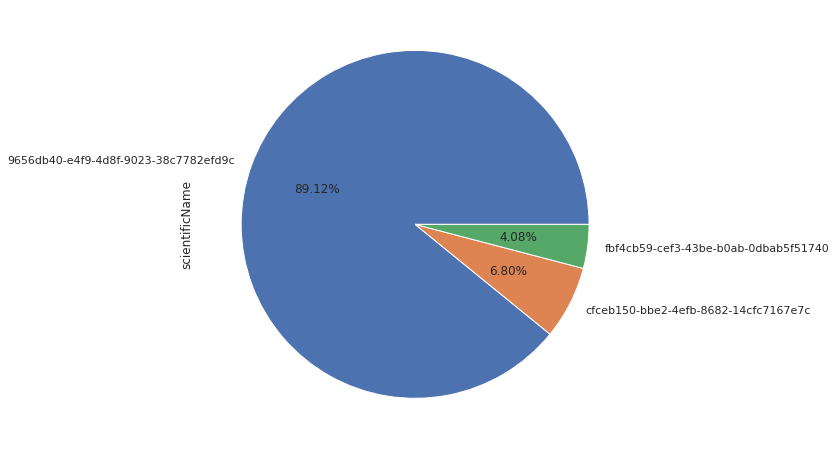

In [ ]:
data.groupby("dataset_id").scientificName.count().plot.pie(autopct="%1.2f%%");

We can see that most of the data we have got for this species has been taken from one single source that accounts for nearly 89% of the total number of records. Therefore, the findings in this analysis might or might not be the complete picture.

So getting started, let us first see what kinds of measurements do we have.

In [ ]:
data["measurementType"].unique()

array(['Individual Density',
       'Proportion coverage mean of biological entity specified elsewhere',
       'Proportion coverage standard deviation of biological entity specified elsewhere',
       'Proportion coverage standard error of biological entity specified elsewhere',
       'cover', 'relief', 'substrate', 'visibility'], dtype=object)

### 1. individual density v/s years

Let us first visualize how `individual density` is spread across years. For this we need to get the `year` first from the `eventDate`.

In [ ]:
data["nYear"] = data["eventDate"].str[:4].astype(int)

In [ ]:
sns.set(style='darkgrid', rc={'figure.figsize':(12,8)})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


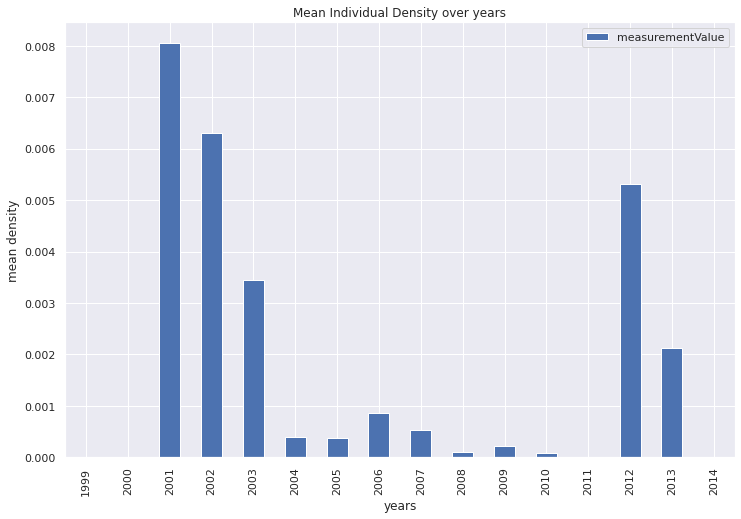

In [ ]:
_ind_dens = data[data["measurementType"]=="Individual Density"]
_ind_dens["measurementValue"] = _ind_dens.measurementValue.astype(float)
_ind_dens.sort_values(by="eventDate", inplace=True)
_ind_dens[["measurementValue","nYear"]].groupby("nYear").mean().plot.bar()
plt.title("Mean Individual Density over years")
plt.xlabel("years")
plt.ylabel("mean density");

From this plot we can see that 
+ the mean individual density over years reduced  significantly starting from 2001 untill it rebounded but to a lesser extent. This is interesting There might have been some efforts to save these kelps after their steep decline that lead to its rejuvenation. 
+ However, more recent records are missing.

Now let us get back to where we started, we'll look again at the measurement types we have.

In [ ]:
data["measurementType"].unique()

array(['Individual Density',
       'Proportion coverage mean of biological entity specified elsewhere',
       'Proportion coverage standard deviation of biological entity specified elsewhere',
       'Proportion coverage standard error of biological entity specified elsewhere',
       'cover', 'relief', 'substrate', 'visibility'], dtype=object)

### 2. Analysing `cover` values

We are going to analyse `cover` values for this we'll do some hard work. We will see what we did later.

In [ ]:
_cov_data = data[data["measurementType"]=='cover']

In [ ]:
l=[]
for i in _cov_data["measurementValue"]:
  l.append({x.strip().split("%")[1].strip():x.strip().split("%")[0] for x in i.split('|')})

In [ ]:
_new_cov = pd.DataFrame(l)

In [ ]:
_new_cov

,crustose coralline,articulated coralline,encrusting red,red seaweed,brown seaweed,none,other brown seaweed,sessile invertebrates,mobile invertebrates,green seaweed,seagrasses
0,16.7,10.0,3.3,46.7,6.7,16.7,NaN,NaN,NaN,NaN,NaN
1,6.7,20.0,3.3,40.0,NaN,13.3,16.7,NaN,NaN,NaN,NaN
2,6.7,3.3,NaN,16.7,NaN,53.3,6.7,13.3,NaN,NaN,NaN
3,20.0,20.0,3.3,20.0,6.7,10.0,20.0,NaN,NaN,NaN,NaN
4,30.0,NaN,3.3,13.3,3.3,13.3,NaN,36.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
573,10.0,20.0,3.3,30.0,NaN,NaN,13.3,23.3,NaN,NaN,NaN
574,16.7,30.0,NaN,43.3,NaN,3.3,NaN,3.3,3.3,NaN,NaN
575,NaN,13.3,10.0,36.7,6.7,20.0,10.0,3.3,NaN,NaN,NaN
576,13.3,43.3,6.7,3.3,NaN,26.7,6.7,NaN,NaN,NaN,NaN


What we did in the previous 4 blocks of code can be summarised as:
+ we got all data which had `cover` as `measurementType`
+ we then saw that the `measurementValue` was a string with percentage composition seprated by `"|"`
+ so we sperated all these values and converted into a dictionary containing keys as the parameter and the percentage value of the parameter as the key-value.
+ we did this for every record and converted it into a kind of JSON data
+ from this JSON data we made a pandas dataframe

> Now let us clean our data to draw a pie chart of average composition for a cover record

In [ ]:
# we will fit in the mean values of parameters in the last row of the dataframe
_new_cov.loc[578] = _new_cov.astype(float).mean()

In [ ]:
# we will now scale every column's mean to fit in between 100 to draw a pie chart
sum = _new_cov.loc[578].sum()
for i in _new_cov.columns:
  _new_cov.loc[578,i]=_new_cov.loc[578,i]/sum*100

In [ ]:
_new_cov.loc[578]

crustose coralline       10.832564
articulated coralline    12.383103
encrusting red             5.13697
red seaweed              15.315015
brown seaweed              6.39694
none                     14.810457
other brown seaweed      10.019982
sessile invertebrates     6.296283
mobile invertebrates      2.810267
green seaweed             5.211607
seagrasses               10.786814
Name: 578, dtype: object

This looks good now. Let us draw a pie chart then.

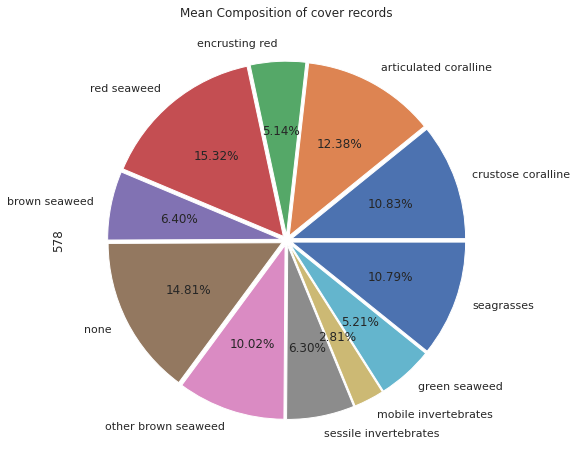

In [ ]:
_new_cov.loc[578].plot.pie(title="Mean Composition of cover records", autopct="%2.2f%%", explode=[0.03]*len(_new_cov.columns));

We can see that most of the records had `red seaweed` as the `cover` with 15.32%, closely followed by `none` or no cover with 14.81%.

Now let us once again look at the unique parameter values we have.

In [ ]:
data["measurementType"].unique()

array(['Individual Density',
       'Proportion coverage mean of biological entity specified elsewhere',
       'Proportion coverage standard deviation of biological entity specified elsewhere',
       'Proportion coverage standard error of biological entity specified elsewhere',
       'cover', 'relief', 'substrate', 'visibility'], dtype=object)

### 3.  `relief` records composition analysis

Now let us analyse the composition of `relief` records.

In [ ]:
data[data["measurementType"]=="relief"]["measurementValue"]

40                                      100.0% > 10cm - 1m
418                     90.0% > 10cm - 1m | 10.0% 0 - 10cm
443                      96.7% > 10cm - 1m | 3.3% 0 - 10cm
455                                     100.0% > 10cm - 1m
527                     96.7% > 10cm - 1m | 3.3% > 1m - 2m
                               ...                        
35488                                   100.0% > 10cm - 1m
35586                                   100.0% > 10cm - 1m
35618      3.3% > 2m | 73.3% > 10cm - 1m | 23.3% > 1m - 2m
35644    3.3% > 1m - 2m | 93.3% > 10cm - 1m | 3.3% 0 - ...
35680                                   100.0% > 10cm - 1m
Name: measurementValue, Length: 578, dtype: object

We can see that the `relief` values have a percentage value for a particular length range.

Now we will analyse `relief` as we did for `cover` but in a different manner.

In [ ]:
_rel_data = data[data["measurementType"]=="relief"]
_rel_data.sort_values(by="eventDate", inplace=True)

In [ ]:
# let us first create an empty dataframe, we will dress up our organised data there
_rel_df = pd.DataFrame()

# since each relief record is a string with data values seperated by "|" we will organise data into our newly created dataframe
for i in _rel_data["measurementValue"]:
  _rel_df=_rel_df.append({x.strip().split("%")[1].strip():x.strip().split("%")[0] for x in i.split('|')}, ignore_index=True)

In [ ]:
# let us look at the organised data
_rel_df

,> 10cm - 1m,0 - 10cm,> 1m - 2m,> 2m
0,83.3,16.7,NaN,NaN
1,83.3,16.7,NaN,NaN
2,83.3,16.7,NaN,NaN
3,83.3,16.7,NaN,NaN
4,83.3,16.7,NaN,NaN
...,...,...,...,...
3489,96.7,NaN,3.3,NaN
3490,96.7,NaN,3.3,NaN
3491,96.7,NaN,3.3,NaN
3492,96.7,NaN,3.3,NaN


We have got some NaNs in the data, which we seriuously don't like at all. Now we will replace all the NaNs with 0.0 as none means 0%.

In [ ]:
_rel_df.fillna(0.0, inplace=True)

In [ ]:
_rel_df

,> 10cm - 1m,0 - 10cm,> 1m - 2m,> 2m
0,83.3,16.7,0.0,0.0
1,83.3,16.7,0.0,0.0
2,83.3,16.7,0.0,0.0
3,83.3,16.7,0.0,0.0
4,83.3,16.7,0.0,0.0
...,...,...,...,...
3489,96.7,0.0,3.3,0.0
3490,96.7,0.0,3.3,0.0
3491,96.7,0.0,3.3,0.0
3492,96.7,0.0,3.3,0.0


Looks good! Now let us plot an `areaplot` from this data.

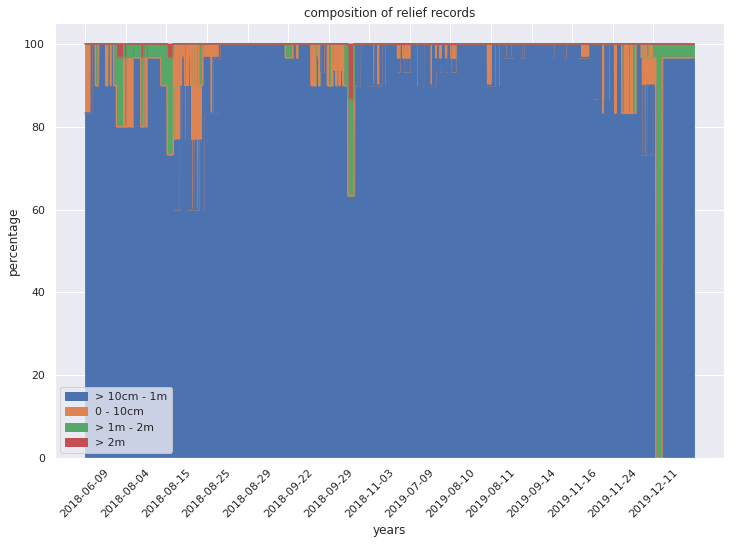

In [ ]:
_rel_df = _rel_df.astype(float)
ax = _rel_df.plot.area()
plt.xlabel("years")
plt.ylabel("percentage")
plt.xticks(np.arange(0,len(_rel_data["eventDate"]), len(_rel_data["eventDate"])/len(_rel_data["eventDate"].unique())),_rel_data["eventDate"].unique(), rotation=45)
plt.title("composition of relief records");

From this plot, we can conclude that:
+ almost all observations have `> 10cm - 1m` length in the most proportion.
+ initially around July-early Aug 2018 records of length `> 1m - 2m` and `0 - 10cm` did exist but have since either declined or appeared not often.
+ we see an unexpected peak for `> 1m - 2m` around early december 2019, which might be record-specific spike.

### 4. `substrate` composition in records

Substrate is the material that rests at the bottom of a stream. Stream substrate can affect the life found within the stream habitat. We will first visualize the `substrate` records as we did for `relief` and then bring out a very interesting plot.

In [ ]:
data[data["measurementType"]=="substrate"]["measurementValue"]

41                            76.7% bedrock | 23.3% cobble
419                             23.3% sand | 76.7% bedrock
444      13.3% boulder | 3.3% cobble | 33.3% sand | 50....
456                           16.7% cobble | 83.3% bedrock
528      20.0% cobble | 63.3% bedrock | 13.3% boulder |...
                               ...                        
35489         20.0% bedrock | 60.0% boulder | 20.0% cobble
35587         26.7% boulder | 16.7% cobble | 56.7% bedrock
35619    13.3% sand | 16.7% cobble | 50.0% bedrock | 20...
35645    20.0% boulder | 13.3% cobble | 26.7% sand | 40...
35681                           36.7% sand | 63.3% bedrock
Name: measurementValue, Length: 578, dtype: object

In [ ]:
_sub_data = data[data["measurementType"]=="substrate"]
_sub_data = _sub_data.sort_values(by="eventDate")

In [ ]:
# let us first create an empty dataframe, we will dress up our organised data there
_sub_df = pd.DataFrame()

# since each substrate record is a string with data values seperated by "|" we will organise data into our newly created dataframe
for i in _sub_data["measurementValue"]:
  _sub_df=_sub_df.append({x.strip().split("%")[1].strip():x.strip().split("%")[0] for x in i.split('|')}, ignore_index=True)

In [ ]:
_sub_df

,cobble,bedrock,boulder,sand
0,10.0,90.0,NaN,NaN
1,10.0,90.0,NaN,NaN
2,10.0,90.0,NaN,NaN
3,10.0,90.0,NaN,NaN
4,10.0,90.0,NaN,NaN
...,...,...,...,...
3489,36.7,36.7,26.7,NaN
3490,36.7,36.7,26.7,NaN
3491,36.7,36.7,26.7,NaN
3492,36.7,36.7,26.7,NaN


Note that we have got so many NaNs. NaNs mean that the particular kind of substrate is missing so essentially it is 0.0%. So, we will replace all NaNs with 0.0.

In [ ]:
_sub_df.fillna(0.0, inplace=True)

Now let us again draw an area plot.

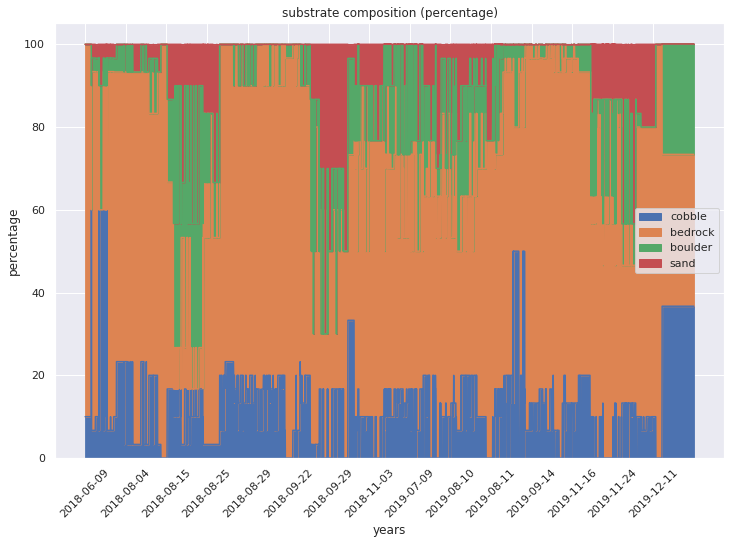

In [ ]:
_sub_df = _sub_df.astype(float)
_sub_df.plot.area()
plt.xlabel("years")
plt.ylabel("percentage")
plt.xticks(np.arange(0,len(_sub_data["eventDate"]), len(_sub_data["eventDate"])/len(_sub_data["eventDate"].unique())),_sub_data["eventDate"].unique(), rotation=45)
plt.title("substrate composition (percentage)");

There is a significant amount of variance in this distribution.

From this plot we can see that most of the substrate is composed of bedrock but
+ the proportion of cobble over time has remained almost constant. Wherever there has been lesser proportion, it has been offset by the occasional spikes.
+ proportion of bedrock, even though the highest, is not fixed and oscillates a lot.
+ it will be difficult to say whether the mean percetage of boulder has decreased over time due to a high variance.

Since substrate composition is quite varied, it will be a nice idea to plot a relation between `cover` and `substrate` since substrate strongly affects the aquatic life.

### 5. Does `substrate` affect `cover`?

We will do some work around for this particular analysis and later plot a correlation heatmap.

In [ ]:
_si_data = data[data["measurementType"]=="substrate"]

In [ ]:
# let us first create an empty dataframe, we will dress up our organised data there
_si_df = pd.DataFrame()

# since each substrate record is a string with data values seperated by "|" we will organise data into our newly created dataframe.
# we will also add the corresponding record's cover parameter if its
for i in _si_data.iterrows():
  _dict = {x.strip().split("%")[1].strip():x.strip().split("%")[0] for x in i[1]["measurementValue"].split('|')}
  _dict.update({x.strip().split("%")[1].strip():x.strip().split("%")[0] for x in data[data["id"] == i[1]["id"]][data[data["id"] == i[1]["id"]]["measurementType"]=="cover"]["measurementValue"].values[0].split("|")})
  _si_df=_si_df.append(_dict, ignore_index=True)

In [ ]:
# now we will replace all NaNs with 0% and cast every value to float type
_si_df.fillna(0.0, inplace=True)
_si_df = _si_df.astype(float)
_si_df

,bedrock,cobble,crustose coralline,articulated coralline,encrusting red,red seaweed,brown seaweed,none,other brown seaweed,sand,boulder,sessile invertebrates,mobile invertebrates,green seaweed,seagrasses,other
0,76.7,23.3,16.7,10.0,3.3,46.7,6.7,16.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,76.7,0.0,6.7,20.0,3.3,40.0,0.0,13.3,16.7,23.3,0.0,0.0,0.0,0.0,0.0,0.0
2,50.0,3.3,6.7,3.3,0.0,16.7,0.0,53.3,6.7,33.3,13.3,13.3,0.0,0.0,0.0,0.0
3,83.3,16.7,20.0,20.0,3.3,20.0,6.7,10.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,63.3,20.0,30.0,0.0,3.3,13.3,3.3,13.3,0.0,3.3,13.3,36.7,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,20.0,20.0,10.0,20.0,3.3,30.0,0.0,0.0,13.3,0.0,60.0,23.3,0.0,0.0,0.0,0.0
574,56.7,16.7,16.7,30.0,0.0,43.3,0.0,3.3,0.0,0.0,26.7,3.3,3.3,0.0,0.0,0.0
575,50.0,16.7,0.0,13.3,10.0,36.7,6.7,20.0,10.0,13.3,20.0,3.3,0.0,0.0,0.0,0.0
576,40.0,13.3,13.3,43.3,6.7,3.3,0.0,26.7,6.7,26.7,20.0,0.0,0.0,0.0,0.0,0.0


Now this looks good. We have done most of the hardwork and the time has come to do the most interesting part of this analysis. Fasten your seatbelts!

We are going to plot a correlation plot between `substrate` parameters and `cover` values to check whether `substrate` indeed affects `cover` or not.

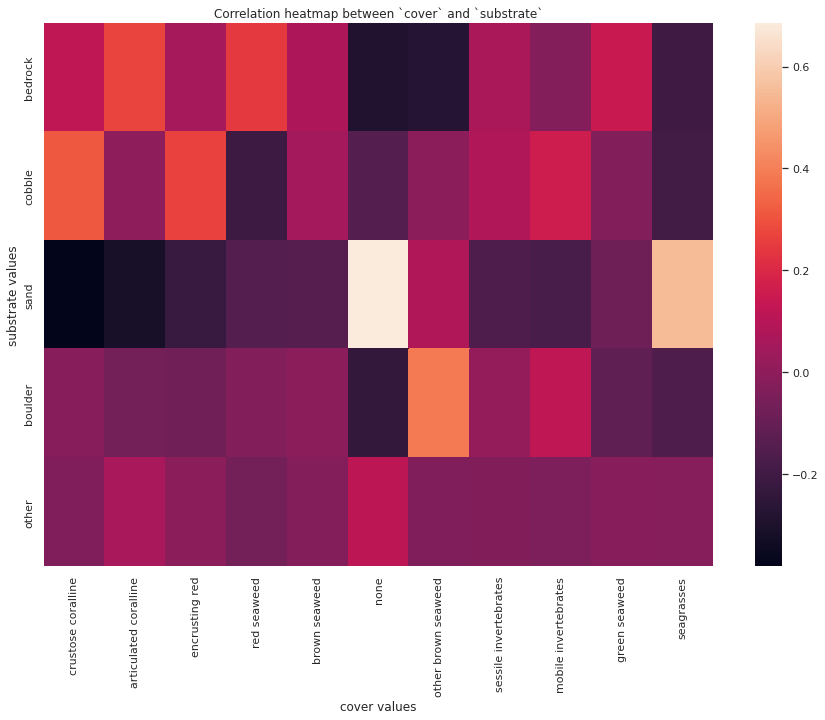

In [ ]:
# let's get the correlation matrix first
corr = _si_df.corr()

# now we will drop the repeated columns from both axis
corr.drop(["other brown seaweed", "crustose coralline","articulated coralline","brown seaweed","encrusting red","red seaweed","sessile invertebrates","mobile invertebrates","green seaweed","seagrasses","none"], axis=0, inplace=True)
corr.drop(["bedrock","cobble","sand","boulder","other"], axis=1, inplace=True)

# now let us draw the correlation heatmap
sns.heatmap(corr)
plt.title("Correlation heatmap between `cover` and `substrate`")
plt.xlabel('cover values')
plt.ylabel('substrate values');

From this correlation plot we can make out that:
+ `sand` substrate and `none` cover are highly correlated, no cover was mostly found when `sand` substrate was significant
+ `bedrock` substrate and `other brown seaweed` are highly negatively correlated, which means when `bedrock` was signficant `other brown seaweed` was hardly found.
+ similarly, `sand` and `crustose coralline` are also significantly negatively correlated.